In [131]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, VBox

In [132]:
def lagrange_basis(j, x_vals, x):
    """Compute j-th Lagrange basis polynomial at x."""
    xj = x_vals[j]
    basis = 1
    for m in range(len(x_vals)):
        if m != j:
            xm = x_vals[m]
            basis *= (x - xm) / (xj - xm)
    return basis


In [133]:
def lagrange_interpolation(x_vals, y_vals, x):
    """Evaluate full Lagrange interpolating polynomial at x."""
    total = 0
    for j in range(len(x_vals)):
        total += y_vals[j] * lagrange_basis(j, x_vals, x)
    return total


In [135]:
def plot_lagrange_basis(x_vals, y_vals=None, show_interpolant=True):
    """
    Plot Lagrange basis polynomials and interpolated polynomial.
    
    Parameters:
    - x_vals: list of interpolation x-points
    - y_vals: list of values f(x_i), defaults to 1s
    - show_interpolant: whether to plot the full interpolated polynomial
    """
    x_vals = list(x_vals)
    k = len(x_vals)
    if y_vals is None:
        y_vals = [1] * k
    assert len(y_vals) == k

    x_plot = np.linspace(min(x_vals) - 0.2, max(x_vals) + 0.2, 500)

    plt.figure(figsize=(10, 6))

    # Plot each basis polynomial
    for j in range(k):
        y_basis = y_vals[j]*lagrange_basis(j, x_vals, x_plot)
        plt.plot(x_plot, y_basis, label=fr'$\ell_{{{j}}}(x)$')

    # Plot interpolated polynomial
    if show_interpolant:
        y_interp = lagrange_interpolation(x_vals, y_vals, x_plot)
        plt.plot(x_plot, y_interp, color='black', linestyle='--', linewidth=2, label=r'$P(x)$')

    # Mark interpolation points
    for xi, yi in zip(x_vals, y_vals):
        plt.plot(xi, yi, 'ro')
        plt.axvline(x=xi, color='gray', linestyle='dotted', alpha=0.4)

    plt.title("Lagrange Basis Polynomials and Interpolant")
    plt.xlabel("x")
    plt.ylabel("y")
#    plt.xlim(-0.2, (k-1)+0.2)
    plt.grid(True)
    plt.legend()
    plt.show()

# Lagrange Basis Polynomials and Interpolant

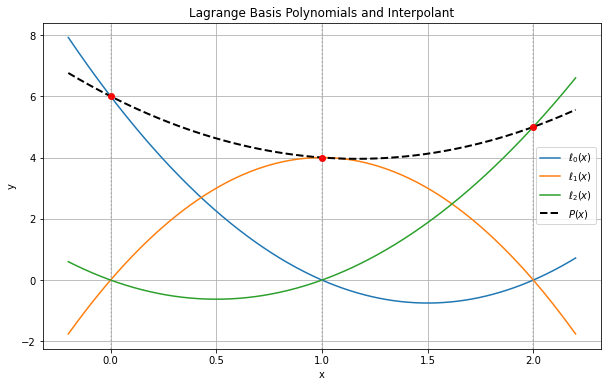

In [136]:
# Degree 4 polynomial (5 points)
x_values = [0, 1, 2, ]
y_values = [6, 4, 5]

plot_lagrange_basis(x_values, y_values, show_interpolant=True)


# Lagrangian Basis Factors

For example: $l_1(x) = \frac{x-x_0}{x_1-x_0} \cdot \frac{x-x_2}{x_1-x_2} \cdot \frac{x-x_3}{x_1-x_3}$

In [137]:
def lagrange_basis_factors(j, x_vals, x):
    """
    Compute all linear factors of the j-th Lagrange basis polynomial at x.
    Returns a list of arrays (each factor evaluated at x).
    """
    xj = x_vals[j]
    factors = []
    for m in range(len(x_vals)):
        if m != j:
            xm = x_vals[m]
            factor = (x - xm) / (xj - xm)
            factors.append((factor, xm))  # Also return zero location
    return factors


In [138]:
def plot_basis_factors(j, x_vals):
    """
    Plots all individual linear factors of the j-th Lagrange basis polynomial
    and their product as the basis polynomial.
    """

    x_vals = list(x_vals)
    x_plot = np.linspace(min(x_vals) - 0.2, max(x_vals) + 0.2, 500)
    factors = lagrange_basis_factors(j, x_vals, x_plot)

    num_factors = len(factors)
    fig, axes = plt.subplots(num_factors + 1, 1, figsize=(8, 2.5 * (num_factors + 1)), sharex=True)

    # Plot each factor with zero-crossing
    for idx, (f, zero_x) in enumerate(factors):
        ax = axes[idx]
        ax.plot(x_plot, f, label=fr'Factor {idx + 1}: $(x-x_{zero_x})(x_{j} - x_{zero_x})$', color='tab:blue')
        ax.axhline(0, color='black', linestyle='dotted')
        ax.plot(zero_x, 0, 'o', color='red', label="Zero crossing")
        ax.legend()
        ax.grid(True)

    # Compute and plot the product
    product_vals = np.prod([f for f, _ in factors], axis=0)
    ax = axes[-1]
    ax.plot(x_plot, product_vals, color='black', label=fr'$\ell_{{{j}}}(x)$', linewidth=2)
    ax.axhline(0, color='black', linestyle='dotted')

    # Mark values at integer x = x_0, ..., x_n
    int_xs = sorted(set(x_vals))
    for x_i in int_xs:
        y_i = np.prod([(x_i - xm) / (x_vals[j] - xm) for m, xm in enumerate(x_vals) if m != j])
        ax.plot(x_i, y_i, 'o', color='red', label="Integer sample" if x_i == int_xs[0] else None)

    ax.legend()
    ax.grid(True)
    ax.set_title(fr'Lagrange Basis $\ell_{{{j}}}(x)$ with Evaluation at Integer $x_{{{j}}}$')
    ax.set_xlabel("x")

    fig.suptitle(fr'$\ell_{{{j}}}(x)$ as Product of Linear Factors', fontsize=14)
    plt.tight_layout()
    plt.show()

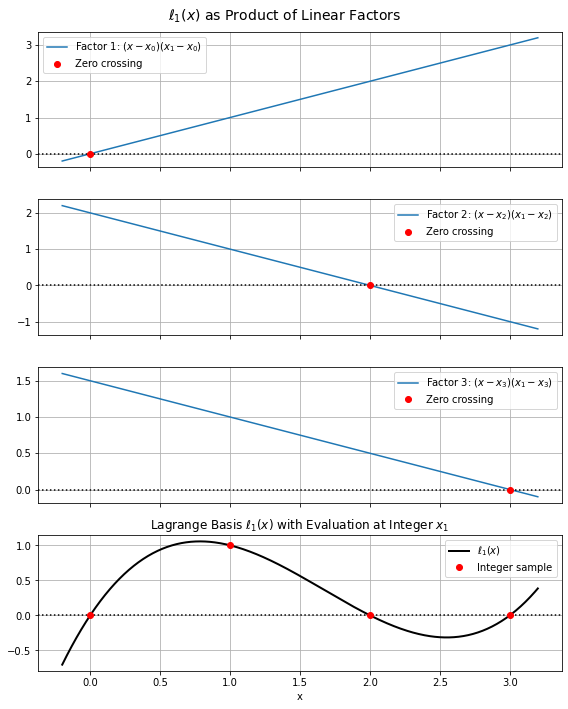

In [139]:
x_values = [0, 1, 2, 3]
plot_basis_factors(j=1, x_vals=x_points)

# Get polynomial coefficients $\sum a_i x^i$ using the Vandermonde method

Given $k+1$ points $(x_i, y_i) \forall i=0 \dots k$: allows to reconstruct unique polynomial of degree at most $k$ 

In [140]:
def evaluate_polynomial(coeffs, x_vals):
    """Evaluate polynomial given by coeffs at x_vals."""
    return np.polyval(coeffs[::-1], x_vals)

def vandermonde_coefficients(x_vals, y_vals):
    """Return monomial coefficients from interpolation using a Vandermonde system."""
    V = np.vander(x_vals, N=len(x_vals), increasing=True)
    return np.linalg.solve(V, y_vals)

def lagrange_basis(j, x_vals, x):
    """Compute j-th Lagrange basis polynomial at x."""
    xj = x_vals[j]
    L = 1
    for m in range(len(x_vals)):
        if m != j:
            xm = x_vals[m]
            L *= (x - xm) / (xj - xm)
    return L

def lagrange_interpolation(x_vals, y_vals, x):
    """Evaluate Lagrange interpolating polynomial at x."""
    total = 0
    for j in range(len(x_vals)):
        total += y_vals[j] * lagrange_basis(j, x_vals, x)
    return total

def demo_polynomial_reconstruction(true_coeffs, x_vals):
    print(f"Given polynomial coefficients (highest degree first): {true_coeffs}")
    
    # Evaluate polynomial at x values
    y_vals = evaluate_polynomial(true_coeffs, x_vals)
    print(f"Evaluated points: {list(zip(x_vals, y_vals))}")

    # Recover coefficients using Vandermonde interpolation
    recovered_coeffs = vandermonde_coefficients(x_vals, y_vals)
    print(f"Recovered monomial coefficients (lowest degree first): {recovered_coeffs}")

    # Evaluate interpolated polynomial using Lagrange and compare
    x_plot = np.linspace(min(x_vals) - 0.2, max(x_vals) + 0.2, 500)
    y_true = evaluate_polynomial(true_coeffs, x_plot)
    y_interp = lagrange_interpolation(x_vals, y_vals, x_plot)

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_true, label="Original Polynomial", linestyle='dashed')
    plt.plot(x_plot, y_interp, label="Lagrange Interpolation", linewidth=2)
    plt.scatter(x_vals, y_vals, color='red', label="Sample Points")
    plt.title("Polynomial Reconstruction: Original vs Lagrange Interpolation")
    plt.xlabel("x")
    plt.ylabel("p(x)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    return recovered_coeffs

Given polynomial coefficients (highest degree first): [1, 2, 1]
Evaluated points: [(0, 1), (1, 4), (2, 9)]
Recovered monomial coefficients (lowest degree first): [1. 2. 1.]


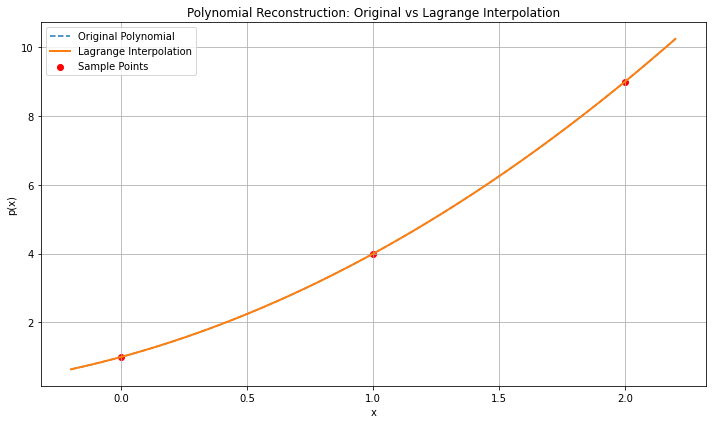

In [153]:
# Define the polynomial: p(x) = 1 + 2x + x^2 (coefficients from lowest to highest degree)
true_coeffs = [1, 2, 1]  # i.e., p(x) = 1 + 2x + x^2

# Choose sample points
x_vals = np.array([0, 1, 2])

# Run the demo
recovered = demo_polynomial_reconstruction(true_coeffs, x_vals)